<a href="https://colab.research.google.com/github/leogalbu/Colab_Notebook/blob/Image_Classification/Multiclass_Food_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import and load the data

In [44]:
# Import libraries
import zipfile
import os
import random
import pathlib
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.layers import BatchNormalization,GlobalAveragePooling2D

In [2]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# unzip data
zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip')
zip_ref.extractall()
zip_ref.close()

--2022-09-01 12:34:24--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.136.128, 142.250.148.128, 209.85.200.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.136.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   290MB/s    in 1.7s    

2022-09-01 12:34:25 (290 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [3]:
# Explore the dataset
for dirpath, dirnames, filenames in os.walk('10_food_classes_all_data'):
  print(f"the are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

  # 10 class, 750 images in training and 250 in test

the are 2 directories and 0 images in '10_food_classes_all_data'
the are 10 directories and 0 images in '10_food_classes_all_data/train'
the are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'
the are 0 directories and 750 images in '10_food_classes_all_data/train/steak'
the are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'
the are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'
the are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'
the are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'
the are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'
the are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'
the are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'
the are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'
the are 10 directories and 0 images

In [4]:
# Setup the train and test directories
train_dir  = '10_food_classes_all_data/train/'
test_dir = '10_food_classes_all_data/test/'

In [5]:
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names);

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [6]:
# Visualize random image
def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f"Image shape: {img.shape}")

  return img

Image shape: (512, 512, 3)


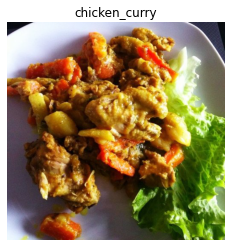

In [7]:
img = view_random_image(train_dir, random.choice(class_names))

## Preprocess Data

In [8]:
# Rescale the data
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# load the data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir, target_size=(224,224), batch_size=32, class_mode='categorical')
test_data = test_datagen.flow_from_directory(test_dir, target_size=(224,224), batch_size=32, class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## Create a model (Baseline)

In [9]:
baseline_model = Sequential([
    Conv2D(10, 3, input_shape=(224,224,3), activation='relu'),
    Conv2D(10,3, activation='relu'),
    MaxPool2D(2),
    Conv2D(10,3, activation='relu'),
    Conv2D(10,3, activation='relu'),
    MaxPool2D(2),
    MaxPool2D(2),
    Flatten(),
    Dense(10, activation='softmax')
])

# Compile the model
baseline_model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adam())

In [10]:
# Fit the model
baseline_history = baseline_model.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 59s 199ms/step - loss: 2.0870 - accuracy: 0.2416 - val_loss: 1.9399 - val_accuracy: 0.3016
Epoch 2/5
235/235 [==============================] - 49s 207ms/step - loss: 1.8498 - accuracy: 0.3605 - val_loss: 1.8707 - val_accuracy: 0.3560
Epoch 3/5
235/235 [==============================] - 49s 207ms/step - loss: 1.7059 - accuracy: 0.4236 - val_loss: 1.7661 - val_accuracy: 0.3992
Epoch 4/5
235/235 [==============================] - 50s 214ms/step - loss: 1.5401 - accuracy: 0.4836 - val_loss: 1.7193 - val_accuracy: 0.4068
Epoch 5/5
235/235 [==============================] - 54s 232ms/step - loss: 1.3581 - accuracy: 0.5520 - val_loss: 1.7646 - val_accuracy: 0.4000


## Evalute the model

In [15]:
baseline_model.evaluate(test_data)

79/79 [==============================] - 12s 147ms/step - loss: 1.7646 - accuracy: 0.4000


[1.764600157737732, 0.4000000059604645]

In [13]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['accuracy']))

  plt.plot(epochs, loss, label='Training loss')
  plt.plot(epochs, val_loss, label='Val Loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()
  plt.figure()
  plt.plot(epochs, accuracy, label='Training Accuracy')
  plt.plot(epochs, val_accuracy, label='Val Accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')

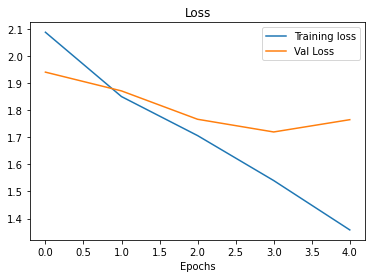

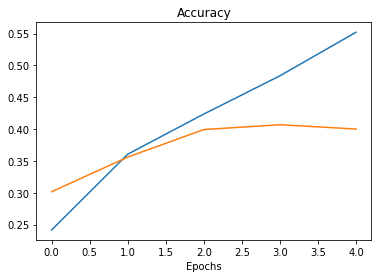

In [14]:
plot_loss_curves(baseline_history)

Model is overfitting, its's fail to generalize to unseen data and perform poorly on test data

## Adjust the model hyperparameters (beat the baseline and reduce overfitting)

In [20]:
model_1 = Sequential([
    Conv2D(32, 3, input_shape=(224,224,3), activation='relu'),
    MaxPool2D(2),
    Conv2D(64,3, activation='relu'),
    MaxPool2D(2),
    Conv2D(128,3, activation='relu'),
    MaxPool2D(2),
    Flatten(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model_1.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adam())

In [21]:
# Fit the model
history_1 = model_1.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 47s 198ms/step - loss: 2.0808 - accuracy: 0.2499 - val_loss: 1.8959 - val_accuracy: 0.3256
Epoch 2/5
235/235 [==============================] - 46s 198ms/step - loss: 1.8391 - accuracy: 0.3683 - val_loss: 1.7926 - val_accuracy: 0.3772
Epoch 3/5
235/235 [==============================] - 47s 199ms/step - loss: 1.6137 - accuracy: 0.4533 - val_loss: 1.7528 - val_accuracy: 0.3964
Epoch 4/5
235/235 [==============================] - 46s 194ms/step - loss: 1.3184 - accuracy: 0.5523 - val_loss: 1.7641 - val_accuracy: 0.4072
Epoch 5/5
235/235 [==============================] - 46s 194ms/step - loss: 0.9903 - accuracy: 0.6707 - val_loss: 1.9449 - val_accuracy: 0.4136


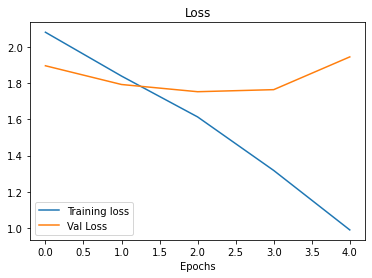

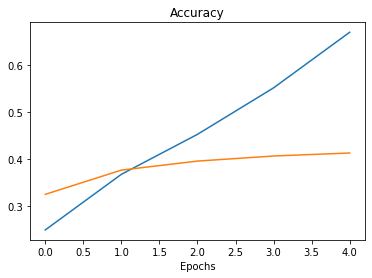

In [22]:
plot_loss_curves(history_1)

## Try with another model using BatchNormalizaztion and GlobalAveregePooling

In [30]:
model_2 = Sequential([
    Conv2D(32,3, activation='relu', input_shape=(224,224,3)),
    MaxPool2D(2),
    BatchNormalization(),
    Conv2D(64,3, activation='relu'),
    MaxPool2D(2),
    BatchNormalization(),
    Conv2D(128,3, activation='relu'),
    MaxPool2D(2),
    BatchNormalization(),
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(10, activation='softmax')
])
# Compile the model
model_2.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adam())

In [32]:
# Fit the model
history_2 = model_2.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 48s 197ms/step - loss: 2.0739 - accuracy: 0.2752 - val_loss: 2.4081 - val_accuracy: 0.1380
Epoch 2/5
235/235 [==============================] - 46s 198ms/step - loss: 1.8787 - accuracy: 0.3621 - val_loss: 2.5800 - val_accuracy: 0.1700
Epoch 3/5
235/235 [==============================] - 46s 195ms/step - loss: 1.7638 - accuracy: 0.4047 - val_loss: 1.8282 - val_accuracy: 0.3856
Epoch 4/5
235/235 [==============================] - 46s 196ms/step - loss: 1.6756 - accuracy: 0.4409 - val_loss: 1.7280 - val_accuracy: 0.3988
Epoch 5/5
235/235 [==============================] - 53s 227ms/step - loss: 1.5812 - accuracy: 0.4823 - val_loss: 1.8452 - val_accuracy: 0.3800


## Using Data Augmentation

In [34]:
train_datagen_augmented = ImageDataGenerator(
        rescale=1/255.,
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

train_data = train_datagen_augmented.flow_from_directory(train_dir, target_size=(224,224), batch_size=32, class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [ ]:
def lr_scheduler(epoch, lr):
    if epoch > 50:
        lr = 0.001
        return lr
    return lr

In [41]:
# Clone model_1
model_3 = tf.keras.models.clone_model(model_1)
# Compile the model
model_3.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adam())

In [42]:
# Fit the model
history_3 = model_3.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 116s 494ms/step - loss: 2.1600 - accuracy: 0.2160 - val_loss: 1.9578 - val_accuracy: 0.3052
Epoch 2/5
235/235 [==============================] - 113s 480ms/step - loss: 2.0312 - accuracy: 0.2872 - val_loss: 1.9081 - val_accuracy: 0.3444
Epoch 3/5
235/235 [==============================] - 115s 491ms/step - loss: 1.9725 - accuracy: 0.3095 - val_loss: 1.8312 - val_accuracy: 0.3600
Epoch 4/5
235/235 [==============================] - 113s 480ms/step - loss: 1.9498 - accuracy: 0.3239 - val_loss: 1.8120 - val_accuracy: 0.3980
Epoch 5/5
235/235 [==============================] - 112s 478ms/step - loss: 1.9230 - accuracy: 0.3348 - val_loss: 1.7360 - val_accuracy: 0.4116


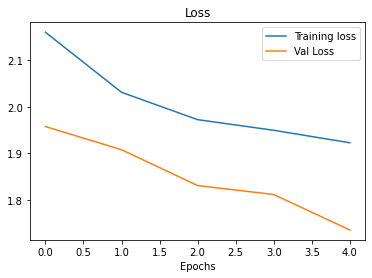

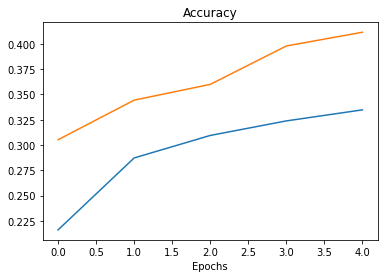

In [43]:
plot_loss_curves(history_3)

In [53]:
# Clone model_1
model_5 = Sequential()
model_5.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (224,224,3)))
model_5.add(MaxPool2D(pool_size=(2,2)))
model_5.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model_5.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model_5.add(Conv2D(filters =128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model_5.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model_5.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model_5.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model_5.add(Flatten())
model_5.add(Dense(512, activation='relu'))
model_5.add(Dense(10, activation = "softmax"))

In [54]:
model_5.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adam())

In [55]:
history_5 = model_5.fit(train_data, epochs=20, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/20
235/235 [==============================] - 118s 497ms/step - loss: 2.3010 - accuracy: 0.1169 - val_loss: 2.1857 - val_accuracy: 0.1872
Epoch 2/20
235/235 [==============================] - 117s 497ms/step - loss: 2.1852 - accuracy: 0.1823 - val_loss: 2.0864 - val_accuracy: 0.2260
Epoch 3/20
235/235 [==============================] - 116s 493ms/step - loss: 2.1247 - accuracy: 0.2204 - val_loss: 1.9957 - val_accuracy: 0.2704
Epoch 4/20
235/235 [==============================] - 116s 494ms/step - loss: 2.0485 - accuracy: 0.2536 - val_loss: 1.9255 - val_accuracy: 0.3096
Epoch 5/20
235/235 [==============================] - 117s 498ms/step - loss: 2.0070 - accuracy: 0.2833 - val_loss: 1.8788 - val_accuracy: 0.3368
Epoch 6/20
235/235 [==============================] - 117s 497ms/step - loss: 1.9481 - accuracy: 0.3157 - val_loss: 1.8240 - val_accuracy: 0.3532
Epoch 7/20
235/235 [==============================] - 115s 488ms/step - loss: 1.8900 - accuracy: 0.3289 - val_loss: 1.6951 -

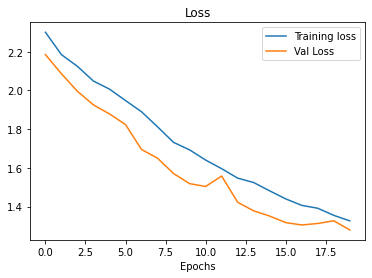

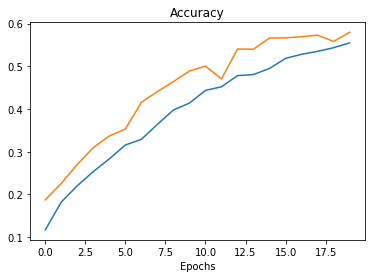

In [56]:
plot_loss_curves(history_5)

In [57]:
model_5.evaluate(test_data)

79/79 [==============================] - 12s 151ms/step - loss: 1.2794 - accuracy: 0.5796


[1.279392123222351, 0.5795999765396118]